<a href="https://colab.research.google.com/github/Sumaiya2000/malicious-url-detection/blob/main/Detecting_malicious_URLs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given a URL, the task is to find out which class the URL belongs to,

Class 0: Benign/ Safe,
Class 1: Unsafe



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Reading the dataset

In [ ]:
dset=pd.read_csv("/content/drive/MyDrive/437 project/malicious_phish.csv")
dset

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
dset.keys()

Index(['url', 'type'], dtype='object')

In [ ]:
dset.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
dset.tail()

,url,type
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


In [ ]:
dset.dtypes

url     object
type    object
dtype: object

In [ ]:
dset.shape

(651191, 2)

In [ ]:
dset.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
dset["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Data Pre-processing

In [ ]:
dset.rename(columns = {'type':'class'},inplace=True)
dset.keys()

Index(['url', 'class'], dtype='object')

In [ ]:
dset['class']=dset['class'].map({'benign':0,'phishing':1, 'defacement':1, 'malware':1})
dset['class'].value_counts()

0    428103
1    223088
Name: class, dtype: int64

In [ ]:
dset.dtypes

url      object
class     int64
dtype: object

In [ ]:
pip install googlesearch-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googlesearch-python: filename=googlesearch_python-1.2.3-py3-none-any.whl size=4212 sha256=5f77271997d99bd649dd317baa32977114c7119185438bdc099d59fdeaba79ac
  Stored in directory: /root/.cache/pip/wheels/98/24/e9/6c225502948c629b01cc895f86406819281ef0da385f3eb669
Successfully built googlesearch-python


In [ ]:
pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
import re
from urllib.parse import urlparse
from tld import get_tld
import os.path
from googlesearch import search
class URLfeatureExtractor:
  def __init__(self, url):
    self.url=url
    self.hasIP=self.hasIP()
    self.hostMatch=self.parser()
    self.googled=self.googleSearched()
    self.https=url.count('https')
    self.http=url.count('http')
    self.hostlen=len(urlparse(url).netloc)
    self.urlLen=len(str(url))
    self.hyp=url.count('-')
    self.ques=url.count('?')
    self.per=url.count('%')
    self.dot=url.count('.')
    self.www=url.count('www')
    self.atrate=url.count('@')
    self.dir=self.no_of_dir()
    self.eq=url.count('=')
    self.emb=self.no_of_embed()
    self.isShort=self.shortening_service()
    self.isSus=self.sus_word()
    self.letters=self.letter_count()
    self.digits=self.digit_count()
    self.fdLen=self.fd_len()
    self.tdLen=self.td_len()


  def parser(self):
    parser=urlparse(self.url)
    if re.search(str(parser.hostname),self.url):
      return 1
    return 0
  def no_of_dir(self):
    return urlparse(self.url).path.count('/')

  def googleSearched(self):
    if search(self.url,3):
      return 1
    return 0
  def hasIP(self):
    if re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', self.url):
      return 1
    return 0
  def no_of_embed(self):
    return urlparse(self.url).path.count('//')
  def shortening_service(self):
    if re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      self.url):
      return 1
    return 0
  def sus_word(self):
    if re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',self.url):
      return 1
    return 0
  def digit_count(self):
    digits = 0
    for i in self.url:
        if i.isnumeric():
            digits+=1
    return digits
  def letter_count(self):
    letters = 0
    for i in self.url:
        if i.isalpha():
            letters+=1
    return letters
  def fd_len(self):
    path= urlparse(self.url).path
    try:
        return len(path.split('/')[1])
    except:
        return 0

  def td_len(self):
    tld=get_tld(self.url,fail_silently=True)
    try:
        return len(tld)
    except:
        return -1


In [ ]:
for i in range(len(dset)):
  url=dset.loc[i,'url']
  url_f=URLfeatureExtractor(url)
  dset.loc[i,'hasIP']=url_f.hasIP
  dset.loc[i,'hostMatch']=url_f.hostMatch
  dset.loc[i,'googled']=url_f.googled
  dset.loc[i,'https']=url_f.https
  dset.loc[i,'http']=url_f.http
  dset.loc[i,'hostlen']=url_f.hostlen
  dset.loc[i,'urllen']=url_f.urlLen
  dset.loc[i,'hyphen']=url_f.hyp
  dset.loc[i,'question']=url_f.ques
  dset.loc[i,'percent']=url_f.per
  dset.loc[i,'dots']=url_f.dot
  dset.loc[i,'www']=url_f.www
  dset.loc[i,'atrates']=url_f.atrate
  dset.loc[i,'dirs']=url_f.dir
  dset.loc[i,'equals']=url_f.eq
  dset.loc[i,'embed']=url_f.emb
  dset.loc[i,'shortened']=url_f.isShort
  dset.loc[i,'susWords']=url_f.isSus
  dset.loc[i,'letters']=url_f.letters
  dset.loc[i,'digits']=url_f.digits
  dset.loc[i,'fdLen']=url_f.fdLen
  dset.loc[i,'tdLen']=url_f.tdLen
dset.head()

,url,class,hasIP,hostMatch,googled,https,http,hostlen,urllen,hyphen,...,atrates,dirs,equals,embed,shortened,susWords,letters,digits,fdLen,tdLen
0,br-icloud.com.br,1,0.0,0.0,1.0,0.0,0.0,0.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,-1.0
1,mp3raid.com/music/krizz_kaliko.html,0,0.0,0.0,1.0,0.0,0.0,0.0,35.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,29.0,1.0,5.0,-1.0
2,bopsecrets.org/rexroth/cr/1.htm,0,0.0,0.0,1.0,0.0,0.0,0.0,31.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,25.0,1.0,7.0,-1.0
3,http://www.garage-pirenne.be/index.php?option=...,1,0.0,1.0,1.0,0.0,1.0,21.0,88.0,1.0,...,0.0,1.0,4.0,0.0,0.0,0.0,63.0,7.0,9.0,2.0
4,http://adventure-nicaragua.net/index.php?optio...,1,0.0,1.0,1.0,0.0,1.0,23.0,235.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,199.0,22.0,9.0,3.0


In [ ]:
for i in dset.keys():
  if i!='url' and i!='class':
    dset[i]=dset[i].astype(int)
dset.dtypes

url          object
class         int64
hasIP         int64
hostMatch     int64
googled       int64
https         int64
http          int64
hostlen       int64
urllen        int64
hyphen        int64
question      int64
percent       int64
dots          int64
www           int64
atrates       int64
dirs          int64
equals        int64
embed         int64
shortened     int64
susWords      int64
letters       int64
digits        int64
fdLen         int64
tdLen         int64
dtype: object

In [ ]:
for i in dset.keys():
  if i!='url':
    print(f"{i:}\n{dset[i].value_counts()}\n")

class
0    428103
1    223088
Name: class, dtype: int64

hasIP
0    643898
1      7293
Name: hasIP, dtype: int64

hostMatch
0    463185
1    188006
Name: hostMatch, dtype: int64

googled
1    651191
Name: googled, dtype: int64

https
0    634768
1     16197
2       183
3        34
5         6
4         3
Name: https, dtype: int64

http
0    461527
1    186625
2      2564
3       455
4        11
9         6
6         2
5         1
Name: http, dtype: int64

hostlen
0      463192
15      15950
13      14592
14      14061
20      12039
        ...  
210         1
125         1
184         1
129         1
179         1
Name: hostlen, Length: 134, dtype: int64

urllen
31      19023
33      14209
34      12243
27      11967
35      11700
        ...  
710         1
1016        1
452         1
1779        1
467         1
Name: urllen, Length: 549, dtype: int64

hyphen
0     377210
1     104187
2      44061
3      27016
4      22128
5      16145
6      12277
7       9347
8       8400
9       67

In [ ]:
x=dset.drop(['url','class','googled'],axis='columns')
y=dset['class']

In [ ]:
x.head()

,hasIP,hostMatch,https,http,hostlen,urllen,hyphen,question,percent,dots,...,atrates,dirs,equals,embed,shortened,susWords,letters,digits,fdLen,tdLen
0,0,0,0,0,0,16,1,0,0,2,...,0,0,0,0,0,0,13,0,0,-1
1,0,0,0,0,0,35,0,0,0,2,...,0,2,0,0,0,0,29,1,5,-1
2,0,0,0,0,0,31,0,0,0,2,...,0,3,0,0,0,0,25,1,7,-1
3,0,1,0,1,21,88,1,1,0,3,...,0,1,4,0,0,0,63,7,9,2
4,0,1,0,1,23,235,1,1,0,2,...,0,1,3,0,0,0,199,22,9,3


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: class, dtype: int64

In [ ]:
x.isna().sum()

hasIP        0
hostMatch    0
https        0
http         0
hostlen      0
urllen       0
hyphen       0
question     0
percent      0
dots         0
www          0
atrates      0
dirs         0
equals       0
embed        0
shortened    0
susWords     0
letters      0
digits       0
fdLen        0
tdLen        0
dtype: int64

In [ ]:
y.isna().sum()

0

Visualization

In [ ]:
# Count the number of instances in each class
class_counts = dset["class"].value_counts()

print('Class distribution:')
print(class_counts)

Class distribution:
0    428103
1    223088
Name: class, dtype: int64


<Axes: xlabel='class', ylabel='count'>

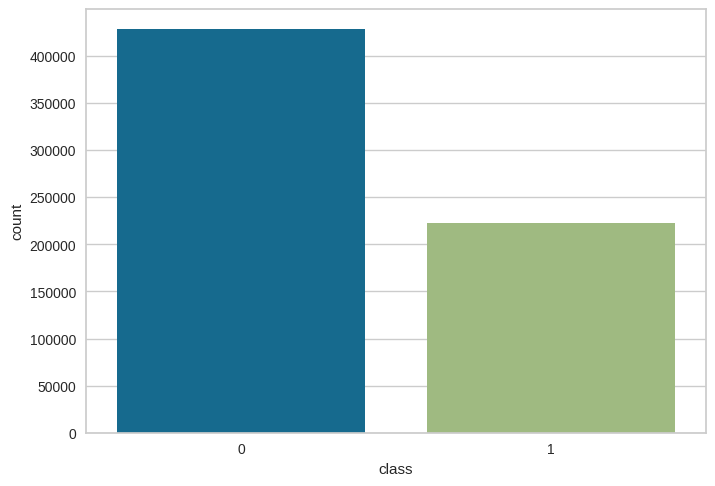

In [ ]:
sns.countplot(x = 'class', data = dset, order = dset['class'].value_counts().index)

<Axes: >

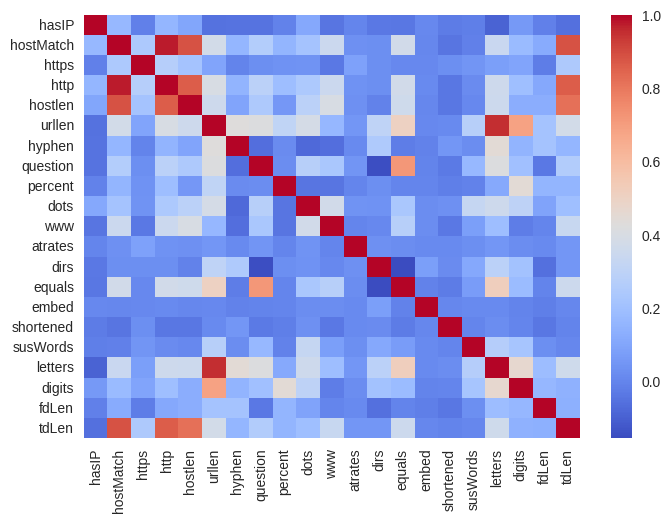

In [ ]:
#heatmap
cr=x.corr()
sns.heatmap(cr, cmap = 'coolwarm')

After dropping correlated columns

In [ ]:
x = x.drop(['http','letters','hostlen','tdLen'],axis="columns")

<Axes: >

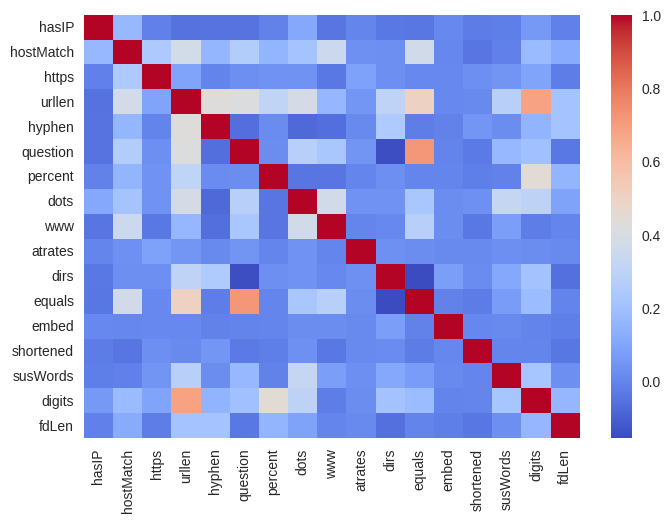

In [ ]:
#heatmap
cr=x.corr()
sns.heatmap(cr, cmap = 'coolwarm')

Train-Test Split

In [ ]:
#random data splitting
#75-25
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=1)

Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Models

In [ ]:
def evaluate(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    cm = metrics.confusion_matrix(y_test,y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8),cmap='flare')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix (Base Model)')
    plt.show()
    print('ROC-AUC\n')
    visualizer = ROCAUC(model, classes=["No", "Yes"])

    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()


              precision    recall  f1-score   support

           0       0.97      0.98      0.98    107001
           1       0.96      0.95      0.95     55797

    accuracy                           0.97    162798
   macro avg       0.97      0.96      0.97    162798
weighted avg       0.97      0.97      0.97    162798



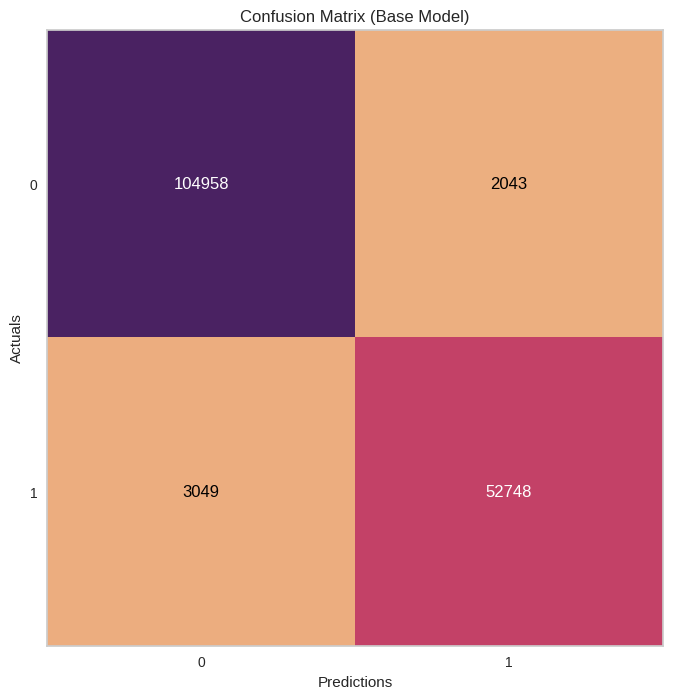

ROC-AUC



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


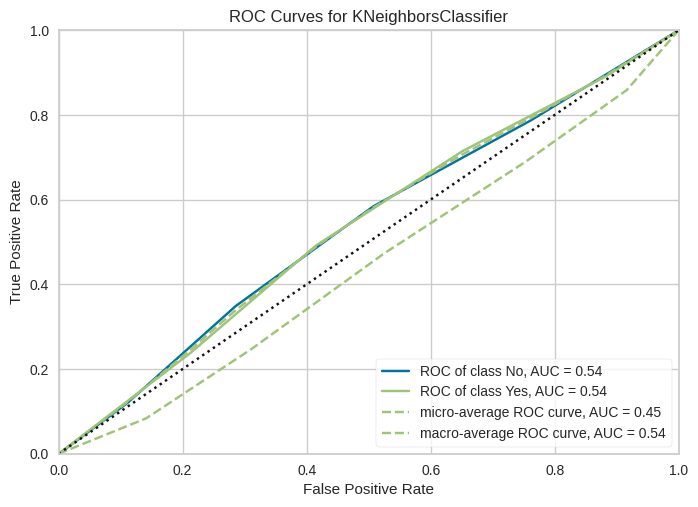

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
evaluate(knn)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    107001
           1       0.97      0.95      0.96     55797

    accuracy                           0.97    162798
   macro avg       0.97      0.97      0.97    162798
weighted avg       0.97      0.97      0.97    162798



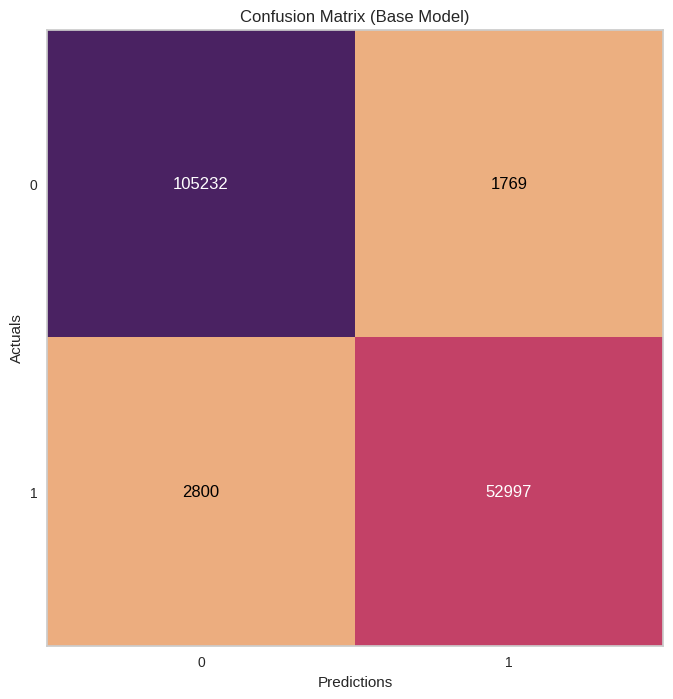

ROC-AUC



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


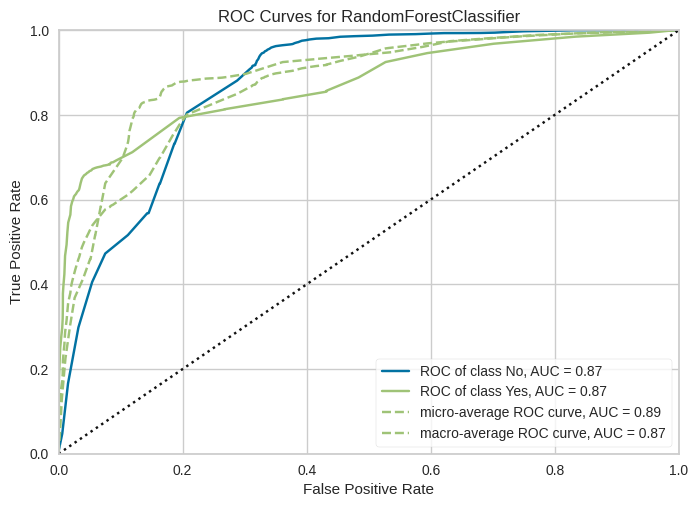

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate(rfc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    107001
           1       0.97      0.94      0.96     55797

    accuracy                           0.97    162798
   macro avg       0.97      0.96      0.97    162798
weighted avg       0.97      0.97      0.97    162798



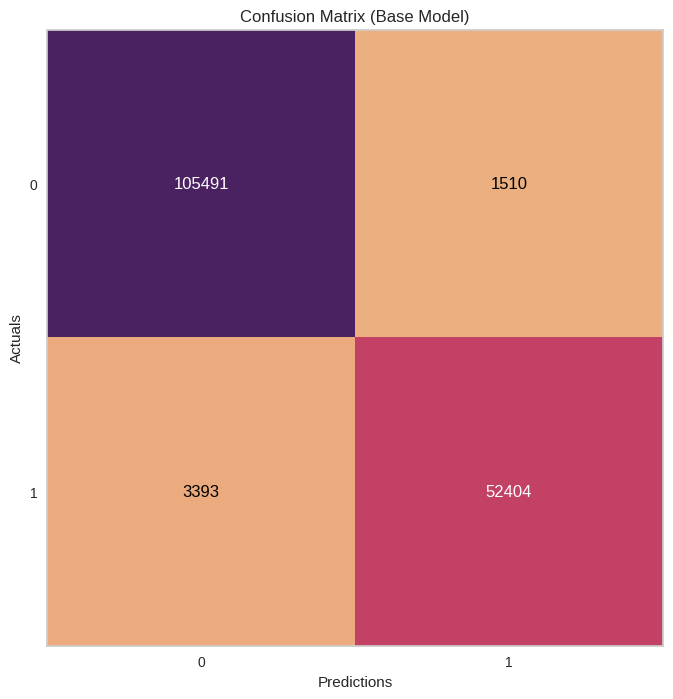

ROC-AUC



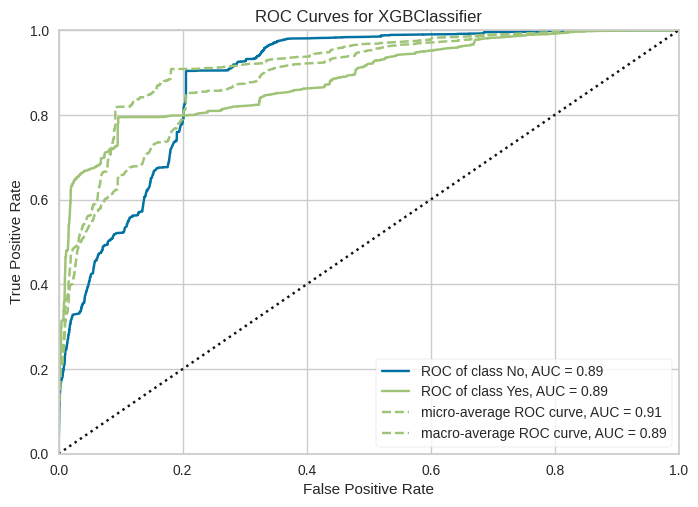

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax', num_class=2)

evaluate(xgb)


              precision    recall  f1-score   support

           0       0.90      0.95      0.92    107001
           1       0.90      0.79      0.84     55797

    accuracy                           0.90    162798
   macro avg       0.90      0.87      0.88    162798
weighted avg       0.90      0.90      0.89    162798



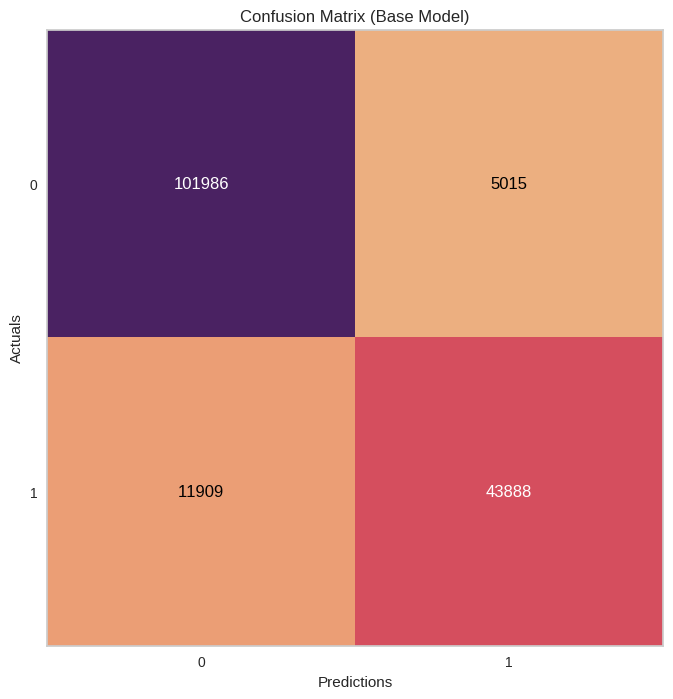

ROC-AUC



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


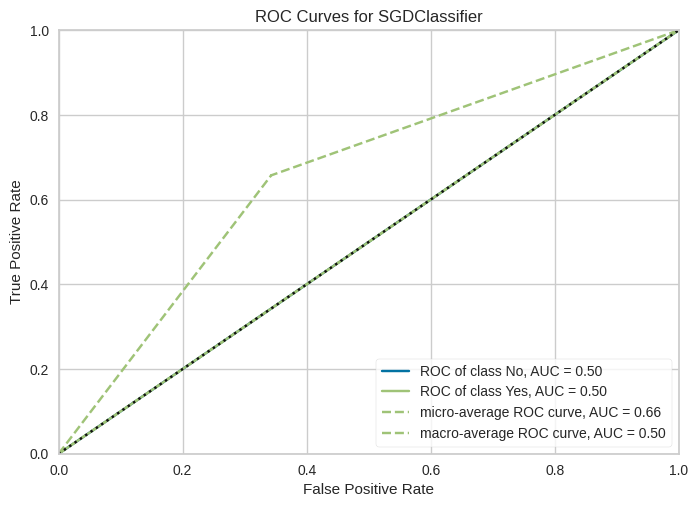

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=10000)
evaluate(sgd)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Create a support vector machine classifier with a radial basis function kernel
# svc = SVC(kernel='rbf', C=10, gamma=0.1)

# # Train the model using the training data
# svc.fit(X_train_scaled, y_train)

# # Make predictions on the testing data
# y_pred = svc.predict(X_test_scaled)

# # Evaluate the model accuracy on the testing data
# accuracy = accuracy_score(y_test, y_pred)
# print("Support Vector Machine Classifier Accuracy:", accuracy)


Best params if needed

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(7)
knn_grid = {"n_neighbors": np.arange(10,20,1),
          }

knnparam = RandomizedSearchCV(KNeighborsClassifier(),
                           param_distributions=knn_grid,
                           cv=2,
                           n_iter=5,
                           verbose=True)

knnparam.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   verbose=True)

In [ ]:
knnparam.best_params_

{'n_neighbors': 10}

In [ ]:
knnparam.best_score_

0.9660027888969265

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("After Tuning KNN: {:.2f}".format(accuracy))


After Tuning KNN: 0.97


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

np.random.seed(7)

# Define the parameter grid for Random Forest
rf_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create the RandomizedSearchCV instance
rf_param = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=2,
    n_iter=5,
    verbose=True
)

# Fit the RandomizedSearchCV on your training data
rf_param.fit(X_train_scaled, y_train)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [ ]:
rf_param.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rf_param.best_score_

0.9707612516716148

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators= 200,min_samples_split= 8,min_samples_leaf= 3,max_features= 'sqrt',max_depth= 20, bootstrap= True, random_state=42)
rfc.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test_scaled)

# Evaluate the model accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("After Tuning Random Forest accuracy: {:.2f}".format(accuracy))

After Tuning Random Forest accuracy: 0.97


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

np.random.seed(7)

# Define the parameter grid for XGBoost
xgb_grid = {
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'n_estimators': np.arange(100, 1000, 100),
    'subsample': np.linspace(0.6, 0.9, 4),
    'colsample_bytree': np.linspace(0.6, 0.9, 4),
    'gamma': np.linspace(0, 1, 5)
}

# Create the RandomizedSearchCV instance
xgb_param = RandomizedSearchCV(
    xgb.XGBClassifier(),
    param_distributions=xgb_grid,
    cv=2,
    n_iter=5,
    verbose=True
)

# Fit the RandomizedSearchCV on your training data
xgb_param.fit(X_train_scaled, y_train)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9])},
                   verbose=True)

In [ ]:
xgb_param.best_params_

{'subsample': 0.9,
 'n_estimators': 500,
 'max_depth': 7,
 'learning_rate': 0.07333333333333333,
 'gamma': 0.0,
 'colsample_bytree': 0.6}

In [ ]:
xgb_param.best_score_

0.9706568278262673

In [ ]:
xgb=XGBClassifier(subsample= 0.9,n_estimators= 500,max_depth= 7,learning_rate= 0.0733, gamma= 0.0, colsample_bytree= 0.6)
xgb.fit(X_train_scaled,y_train)
y_pred= xgb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("After Tuning XGB accuracy: {:.2f}".format(accuracy))

After Tuning XGB accuracy: 0.97


In [ ]:

# Assuming you already have trained an XGBoost model and obtained the predicted probabilities
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]  # Assuming the positive class is at index 1

# Define a new threshold
new_threshold = 0.5

# Adjust the predictions based on the new threshold
y_pred_adjusted = np.where(y_pred_proba >= new_threshold, 1, 0)

# You can now use y_pred_adjusted for further analysis or evaluation

accuracy = accuracy_score(y_test, y_pred_adjusted)
print("After Tuning XGB accuracy: {:.2f}".format(accuracy))

After Tuning XGB accuracy: 0.97
